In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open("timelog.txt", "r")
s = f.readlines()
s

['[(1, 1000000000, 91.366968, 1.233652)\n',
 '(1, 1000000000, 87.610123, 1.233652)\n',
 '(1, 1000000000, 88.554529, 1.233652)\n',
 '(2, 1000000000, 44.279643, 1.233704)\n',
 '(2, 1000000000, 43.829211, 1.233704)\n',
 '(2, 1000000000, 44.282562, 1.233704)\n',
 '(3, 1000000000, 29.705622, 1.233701)\n',
 '(3, 1000000000, 29.314450, 1.233701)\n',
 '(3, 1000000000, 29.502586, 1.233701)\n',
 '(4, 1000000000, 22.325890, 1.233717)\n',
 '(4, 1000000000, 22.258681, 1.233717)\n',
 '(4, 1000000000, 22.395104, 1.233717)\n',
 '(5, 1000000000, 22.741481, 1.233701)\n',
 '(5, 1000000000, 22.955821, 1.233701)\n',
 '(5, 1000000000, 22.849861, 1.233701)\n',
 '(6, 1000000000, 22.645747, 1.233578)\n',
 '(6, 1000000000, 23.169740, 1.233578)\n',
 '(6, 1000000000, 22.189110, 1.233578)\n',
 '(7, 1000000000, 22.260679, 1.233544)\n',
 '(7, 1000000000, 22.305571, 1.233544)\n',
 '(7, 1000000000, 22.427058, 1.233544)\n',
 '(8, 1000000000, 21.998780, 1.233576)\n',
 '(8, 1000000000, 22.055722, 1.233576)\n',
 '(8, 1000

In [12]:
a = eval(",".join(s))
a = np.array(a)
print(a)

[[  1.00000000e+00   1.00000000e+09   9.13669680e+01   1.23365200e+00]
 [  1.00000000e+00   1.00000000e+09   8.76101230e+01   1.23365200e+00]
 [  1.00000000e+00   1.00000000e+09   8.85545290e+01   1.23365200e+00]
 [  2.00000000e+00   1.00000000e+09   4.42796430e+01   1.23370400e+00]
 [  2.00000000e+00   1.00000000e+09   4.38292110e+01   1.23370400e+00]
 [  2.00000000e+00   1.00000000e+09   4.42825620e+01   1.23370400e+00]
 [  3.00000000e+00   1.00000000e+09   2.97056220e+01   1.23370100e+00]
 [  3.00000000e+00   1.00000000e+09   2.93144500e+01   1.23370100e+00]
 [  3.00000000e+00   1.00000000e+09   2.95025860e+01   1.23370100e+00]
 [  4.00000000e+00   1.00000000e+09   2.23258900e+01   1.23371700e+00]
 [  4.00000000e+00   1.00000000e+09   2.22586810e+01   1.23371700e+00]
 [  4.00000000e+00   1.00000000e+09   2.23951040e+01   1.23371700e+00]
 [  5.00000000e+00   1.00000000e+09   2.27414810e+01   1.23370100e+00]
 [  5.00000000e+00   1.00000000e+09   2.29558210e+01   1.23370100e+00]
 [  5.

_____________
Подсчитаем среднее значение интеграла (должно быть ~1.2337) и его стандартное отклонение

In [16]:
a[:, 3].mean(), a[:, 3].std()

(1.2336409999999998, 5.5995535536298936e-05)

In [76]:
data = np.array([a[i*3:i*3+3, 2] for i in range(len(a) / 3)])
data

array([[ 91.366968,  87.610123,  88.554529],
       [ 44.279643,  43.829211,  44.282562],
       [ 29.705622,  29.31445 ,  29.502586],
       [ 22.32589 ,  22.258681,  22.395104],
       [ 22.741481,  22.955821,  22.849861],
       [ 22.645747,  23.16974 ,  22.18911 ],
       [ 22.260679,  22.305571,  22.427058],
       [ 21.99878 ,  22.055722,  22.305488],
       [ 22.414816,  22.545722,  22.376602],
       [ 21.98712 ,  22.462839,  22.430101],
       [ 22.562825,  22.678823,  22.728794],
       [ 22.563905,  22.907919,  21.993446]])

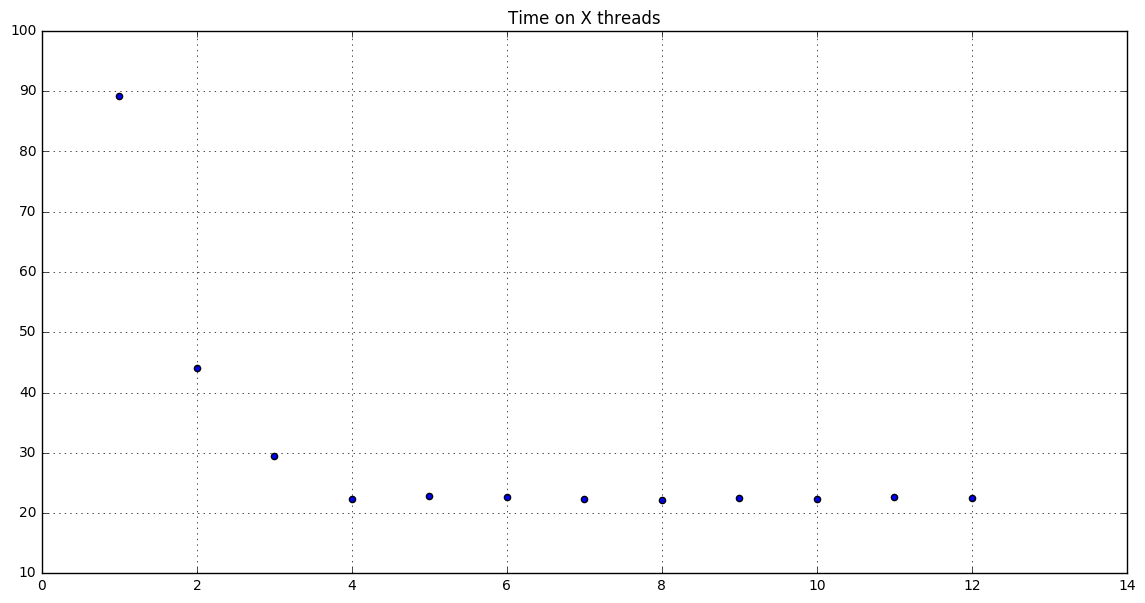

In [77]:
plt.figure(figsize=(14,7))
plt.title("Time on X threads")
plt.scatter(np.arange(len(data))+1, data.mean(axis=1))
plt.grid()
plt.show()

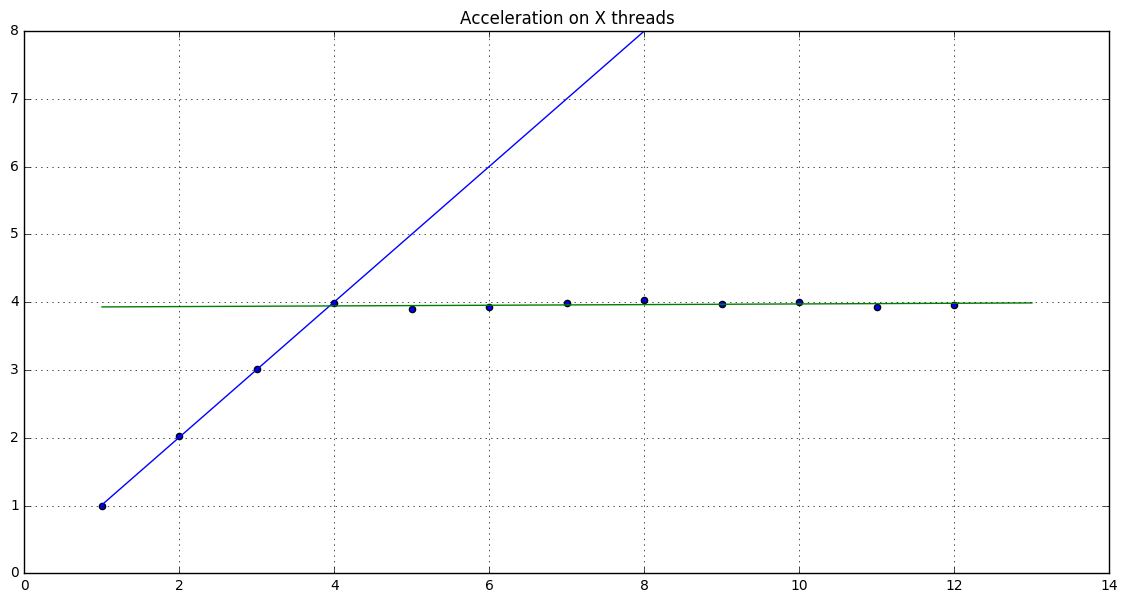

In [80]:
plt.figure(figsize=(14,7))
plt.title("Acceleration on X threads")
x = np.arange(len(data))+1
y = data.mean(axis=1)[0] / data.mean(axis=1) 

plt.scatter(x, y)

grid = np.linspace(0, len(y), 1000) + 1

p1 = np.poly1d(np.polyfit(x, y, deg=4))
# plt.plot(grid, map(p1, grid))

p2 = np.poly1d(np.polyfit(x[:4], y[:4], deg=1))
plt.plot(grid, map(p2, grid))

p3 = np.poly1d(np.polyfit(x[4:], y[4:], deg=1))
plt.plot(grid, map(p3, grid))

plt.grid()
plt.ylim(ymax=8)
plt.savefig('acceleration.png', format='png', dpi=300)
plt.show()